### Bioinformatics Project - Computational Drug Discovery 

 #### Build a regression model of acetylcholinesterase inhibitors using the random forest algorithmusing the ChEMBL bioactivity data.
 


Acetylcholinesterase inhibitors (like donepezil, rivastigmine, and galantamine) are used to treat cognitive symptoms in Alzheimer’s disease by increasing acetylcholine levels in the brain. Inhibiting acetylcholinesterase temporarily can improve neural transmission in areas affected by the disease.

Thus, acetylcholinesterase plays a vital role in nervous system function, making it an important enzyme for understanding and treating neurological diseases.


 

### 1- Installing libraries
 Install the ChEMBL web service package so that I can retrieve bioactivity data from the ChEMBL Database.

In [1]:


! pip install chembl_webresource_client


In [2]:
# Import necessary libriries

import pandas as pd
from chembl_webresource_client.new_client import new_client


In [3]:
# Target search for coronavirus
from chembl_webresource_client.new_client import new_client
import pandas as pd

# Initialize the target search client
target = new_client.target

# Search for targets matching 'Acetylcholinesterase'
target_query = target.search('Acetylcholinesterase')

# Convert the search results to a DataFrame for easier analysis
targets_df = pd.DataFrame.from_dict(target_query)

# Display the DataFrame
targets_df



,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


### Select and retrieve bioactivity data for Human Acetylcholinesterase (first entry)

In [4]:
selected_target = targets_df.target_chembl_id[0]
selected_target

'CHEMBL220'

### Retrieve only bioactivity data for Human Acetylcholinesterase (CHEMBL220) that are reported as pChEMBL values.

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

### Handling missing Values

In [8]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-8-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.16
9087,None,None,25402914,[],CHEMBL5303778,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,5.1
9088,None,None,25402962,[],CHEMBL5303826,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.0
9089,None,None,25403899,[],CHEMBL5303876,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.2


In [9]:
len(df2.canonical_smiles.unique())

6369

In [10]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.16
9087,None,None,25402914,[],CHEMBL5303778,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,5.1
9088,None,None,25402962,[],CHEMBL5303826,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.0
9089,None,None,25403899,[],CHEMBL5303876,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.2


### Data pre-processing of the bioactivity data**


In [11]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.0
9087,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.0
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73


In [12]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

In [13]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

### Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [14]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [15]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5



,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive


In [16]:
df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)


In [17]:
! zip acetylcholinesterase.zip *.csv

updating: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
updating: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 80%)
updating: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
updating: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
updating: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 75%)
updating: descriptors_output.csv (deflated 96%)
updating: mannwhitneyu_LogP.csv (deflated 9%)
updating: mannwhitneyu_MW.csv (deflated 9%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: mannwhitneyu_pIC50.csv (deflated 14%)


### Descriptor Calculation and Exploratory Data Analysis.




### Install Conda and rdkit

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh


--2024-11-21 11:39:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.14’

Miniconda3-py37_4.8 100%[===================>]  81.12M  5.67MB/s    in 14s     

2024-11-21 11:40:11 (5.66 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.14’ saved [85055499/85055499]



In [2]:

! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -u -p /Users/maryamtaherzadeh/miniconda


PREFIX=/Users/maryamtaherzadeh/miniconda
Unpacking payload ...
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 404: /Users/maryamtaherzadeh/miniconda/conda.exe: cannot execute binary file
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 406: /Users/maryamtaherzadeh/miniconda/conda.exe: cannot execute binary file


In [3]:
conda install -c conda-forge rdkit

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


In [5]:
import pandas as pd
df =pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')

In [6]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive


In [7]:
df_no_smiles = df.drop(columns='canonical_smiles')


# Initialize an empty list to store the longest SMILES for each entry
smiles = []

# Iterate over each SMILES string in the 'canonical_smiles' column of df
for i in df.canonical_smiles.tolist():
    # Split the SMILES string by periods to separate components (if any)
    cpd = str(i).split('.')
    # Find the longest component by length (assuming it’s the main structure)
    cpd_longest = max(cpd, key=len)
    # Append the longest component to the smiles list
    smiles.append(cpd_longest)

# Convert the list to a pandas Series and name it 'canonical_smiles'
smiles = pd.Series(smiles, name='canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6364,CHEMBL2238282,160.00,active,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl
6365,CHEMBL4636881,7943.28,intermediate,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...
6366,CHEMBL4635134,100000.00,inactive,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O
6367,CHEMBL4639128,63095.73,inactive,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...


### Calculate Lipinski descriptors

The Lipinski descriptors, formulated by Christopher Lipinski at Pfizer, provide a set of guidelines to assess the drug-likeness of chemical compounds. These guidelines are based on key properties influencing a compound's pharmacokinetic profile—specifically, how it is absorbed, distributed, metabolized, and excreted (ADME) in the body. By analyzing the properties of FDA-approved oral drugs, Lipinski developed what is now known as the Rule of Five.

The Rule of Five specifies that, for a compound to have favorable oral bioavailability, it typically should satisfy the following criteria:

Molecular Weight: Less than 500 Daltons.
Octanol-Water Partition Coefficient (LogP): Less than 5.
Hydrogen Bond Donors: Fewer than 5.
Hydrogen Bond Acceptors: Fewer than 10.

In [8]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
     


RDKit WARNING: [11:41:44] Enabling RDKit 2019.09.3 jupyter extensions


### Calculate descriptors


In [9]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [10]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
6364,331.868,5.28790,0.0,3.0
6365,414.477,3.95740,3.0,4.0
6366,325.368,1.14840,2.0,4.0
6367,511.626,5.60034,1.0,8.0


### Combing DataFrames

In [11]:
df_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
6364,331.868,5.28790,0.0,3.0
6365,414.477,3.95740,3.0,4.0
6366,325.368,1.14840,2.0,4.0
6367,511.626,5.60034,1.0,8.0


In [12]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive


In [13]:
df_combined = pd.concat([df,df_lipinski], axis=1)


In [14]:
df_combined


,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.80320,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.55460,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.35740,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.70690,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.09530,0.0,6.0
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active,331.868,5.28790,0.0,3.0
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate,414.477,3.95740,3.0,4.0
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive,325.368,1.14840,2.0,4.0
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive,511.626,5.60034,1.0,8.0


### Convert IC50 to pIC50



In [15]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x


#### Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.



In [16]:
df_combined.standard_value.describe()


count    6.369000e+03
mean     1.032539e+05
std      9.065149e+05
min      0.000000e+00
25%      1.445000e+02
50%      2.260000e+03
75%      1.580000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [17]:
-np.log10( (10**-9)* 100000000 )


1.0

In [18]:
-np.log10( (10**-9)* 10000000000 )


-1.0

In [19]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x
     

In [20]:
## first apply the norm_value() function so that the values in the standard_value column is normalized.

df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,800.00
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,160.00
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,intermediate,414.477,3.95740,3.0,4.0,7943.28
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,100000.00
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,63095.73


In [21]:
df_norm.standard_value_norm.describe()


count    6.369000e+03
mean     1.032539e+05
std      9.065149e+05
min      0.000000e+00
25%      1.445000e+02
50%      2.260000e+03
75%      1.580000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [22]:

df_final = pIC50(df_norm)
df_final

<ipython-input-15-bf09df1ccbf9>:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,6.795880
6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,intermediate,414.477,3.95740,3.0,4.0,5.100000
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,4.000000
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,4.200000


In [23]:
df_final.pIC50.describe()


count    6369.000000
mean             inf
std              NaN
min         1.304518
25%         4.801343
50%         5.645892
75%         6.840132
max              inf
Name: pIC50, dtype: float64

In [24]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')


### Removing the 'intermediate' bioactivity class


In [25]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6363,CHEMBL2238280,Cc1ccc(C(=O)/C=C/c2ccc(N3CCCCC3)cc2)s1,active,311.450,4.94292,0.0,3.0,6.886057
6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,6.795880
6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,4.000000
6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,4.200000


In [26]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')


### Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors


In [27]:

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes


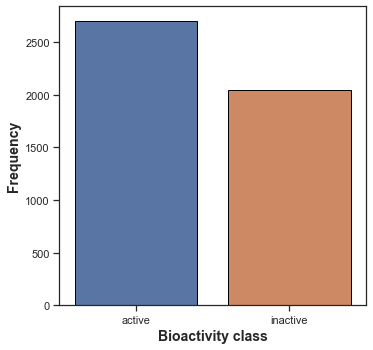

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot of MW versus LogP


In [29]:
# Check for NaN values
print(df_2class[['MW', 'LogP', 'pIC50']].isna().sum())

# Check for infinite values
print(df_2class[['MW', 'LogP', 'pIC50']].applymap(np.isinf).sum())


MW       0
LogP     0
pIC50    0
dtype: int64
MW       0
LogP     0
pIC50    1
dtype: int64


In [30]:
# Replace infinite values with NaN and drop rows with NaN
df_2class = df_2class.replace([np.inf, -np.inf], np.nan).dropna(subset=['MW', 'LogP', 'pIC50'])

molecule_chembl_id     object
canonical_smiles       object
class                  object
MW                    float64
LogP                  float64
NumHDonors            float64
NumHAcceptors         float64
pIC50                 float64
dtype: object


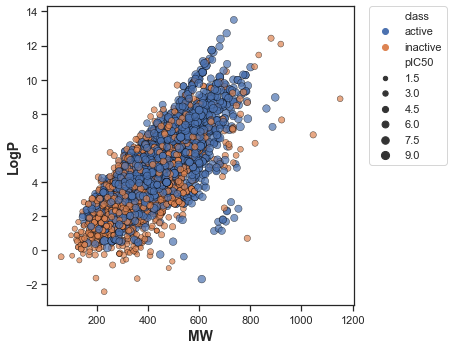

In [31]:
print(df_2class.dtypes)

df_2class['pIC50'] = df_2class['pIC50'].clip(lower=0, upper=10)  # Example range
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(
    x='MW', 
    y='LogP', 
    data=df_2class, 
    hue='class', 
    size='pIC50', 
    edgecolor='black', 
    alpha=0.7
)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Save the plot
plt.savefig('plot_MW_vs_LogP.pdf')
plt.show()


### Box Plots

### pIC50 value

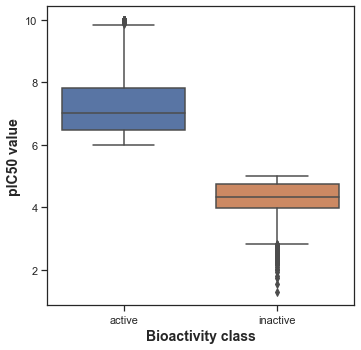

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [33]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [34]:
mannwhitney('pIC50')


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


## MW

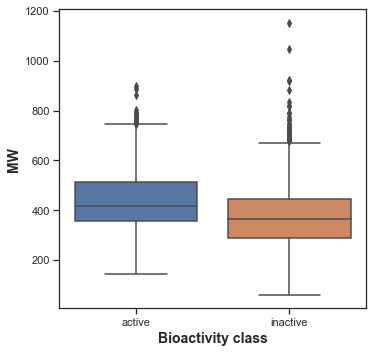

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')
     

In [36]:
mannwhitney('MW')


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1951625.0,3.418231e-68,0.05,Different distribution (reject H0)


### logP

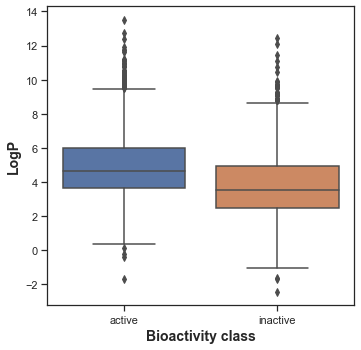

In [37]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [38]:
#Statistical analysis | Mann-Whitney U Test
mannwhitney('LogP')



,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1828352.5,1.125777e-89,0.05,Different distribution (reject H0)


### NumHDonors


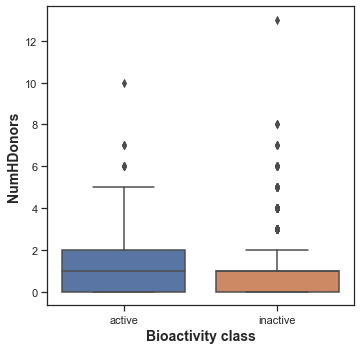

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

### NumHAcceptors


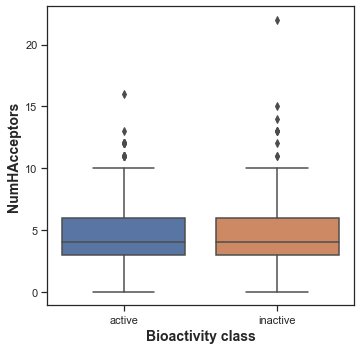

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [41]:
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2553919.0,0.000002,0.05,Different distribution (reject H0)


### Interpretation of Statistical Results
Boxplots
Analyzing the pIC50 measurements, the active and inactive groups demonstrated a statistically significant difference. This outcome is expected, given that threshold criteria were applied (IC50 < 1,000 nM = Active, IC50 > 10,000 nM = Inactive, which translates to pIC50 > 6 = Active and pIC50 < 5 = Inactive) to classify the compounds.

### Lipinski Descriptors
All four Lipinski descriptors showed a statistically significant difference between the active and inactive groups.

### PaDEL-Descriptor?
PaDEL-Descriptor is a software tool used for calculating molecular descriptors and fingerprints from chemical structure files (e.g., SMILES). It is written in Java and is widely used in cheminformatics.

In [42]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-11-21 11:44:28--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-11-21 11:44:29--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.6’

padel.zip.6         100%[===================>]  24.57M  5.68MB/s    in 4.3s    

2024-11-21 11:44:33 (5.69 MB/s) - ‘padel.zip.6’ saved [25768637/25768637]

--2024-11-21 11:44:33--  https://g

In [ ]:
!unzip padel.zip 





Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Load bioactivity data


In [1]:
import pandas as pd
df3=pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [2]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
6364,6364,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,active,331.868,5.28790,0.0,3.0,6.795880
6365,6365,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,intermediate,414.477,3.95740,3.0,4.0,5.100000
6366,6366,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,4.000000
6367,6367,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,inactive,511.626,5.60034,1.0,8.0,4.200000


In [3]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [4]:
! cat molecule.smi | head -7


CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL130112
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C	CHEMBL130098
cat: stdout: Broken pipe


### Fingerprint Descriptors
Fingerprint descriptors are computational representations of molecular structures, often used in cheminformatics and drug discovery. They encode chemical information about a molecule (such as atoms, bonds, and functional groups) into a binary or numerical vector format. These vectors are designed to capture the structural or functional features of a molecule in a format that can be easily analyzed by computational models or algorithms.



In [5]:
! cat molecule.smi | wc -l


    6369


### Calculate fingerprint descriptors


In [6]:
! cat padel.sh


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [7]:
! bash padel.sh


Processing CHEMBL133897 in molecule.smi (1/6369). 
Processing CHEMBL336398 in molecule.smi (2/6369). 
Processing CHEMBL131588 in molecule.smi (3/6369). 
Processing CHEMBL130628 in molecule.smi (4/6369). 
Processing CHEMBL130112 in molecule.smi (6/6369). Average speed: 2.47 s/mol.
Processing CHEMBL130478 in molecule.smi (5/6369). Average speed: 4.70 s/mol.
Processing CHEMBL130098 in molecule.smi (7/6369). Average speed: 1.68 s/mol.
Processing CHEMBL337486 in molecule.smi (8/6369). Average speed: 1.68 s/mol.
Processing CHEMBL336538 in molecule.smi (9/6369). Average speed: 1.03 s/mol.
Processing CHEMBL131051 in molecule.smi (10/6369). Average speed: 1.07 s/mol.
Processing CHEMBL341437 in molecule.smi (11/6369). Average speed: 0.77 s/mol.
Processing CHEMBL335033 in molecule.smi (12/6369). Average speed: 0.79 s/mol.
Processing CHEMBL122983 in molecule.smi (13/6369). Average speed: 0.70 s/mol.
Processing CHEMBL338720 in molecule.smi (14/6369). Average speed: 0.65 s/mol.
Processing CHEMBL3399

In [8]:
! ls -l


total 3701728
-rw-r--r--    1 maryamtaherzadeh  staff          0 Nov 30  2019 -
drwxr-xr-x@   6 maryamtaherzadeh  staff        192 Feb 21  2021 19529_Maryam_Taherzadeh_Lab6
-rw-r--r--    1 maryamtaherzadeh  staff     848707 Nov 21 12:12 ;a,;x.ipynb
-rw-r--r--    1 maryamtaherzadeh  staff          0 Nov 30  2019 AND
drwxr-xr-x   17 maryamtaherzadeh  staff        544 Jan 25  2022 AndroidStudioProjects
drwxr-xr-x    6 maryamtaherzadeh  staff        192 Sep 26  2023 Applications
drwxr-xr-x    2 maryamtaherzadeh  staff         64 Nov  8  2020 Classes
drwx------@   4 maryamtaherzadeh  staff        128 Jun 13  2022 Creative Cloud Files
drwx------@  15 maryamtaherzadeh  staff        480 Nov 19 13:21 Desktop
drwx------@  27 maryamtaherzadeh  staff        864 Nov  6 12:05 Documents
drwxr-xr-x    3 maryamtaherzadeh  staff         96 Oct 20  2021 Download
drwx------@  24 maryamtaherzadeh  staff        768 Nov 14 13:16 Downloads
-rw-r--r--    1 maryamtaherzadeh  staff      81613 May 10  2021 Downlo

### Preparing the X and Y Data Matrices


### X data matrix


In [9]:
df3_X = pd.read_csv('descriptors_output.csv')


In [10]:
df3_X 

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6365,CHEMBL4635134,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6366,CHEMBL4636881,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6367,CHEMBL5078078,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Y variable


### Convert IC50 to pIC50


In [12]:
df3_Y = df3['pIC50']


In [13]:
df3_Y


0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6364    6.795880
6365    5.100000
6366    4.000000
6367    4.200000
6368    5.000000
Name: pIC50, Length: 6369, dtype: float64

### Combining X and Y variable


In [14]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)


In [15]:
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.795880
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.100000
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
6367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.200000


In [16]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)


### Build a regression model of acetylcholinesterase inhibitors using the random forest algorithm

### 1. Import Libraries

In [17]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### 2.load the dataset

In [22]:

df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.795880
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.100000
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
6367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.200000


### 3.Input features

#### The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).



### 3.1. Input features


In [25]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 3.2. Output features


In [27]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6364    6.795880
6365    5.100000
6366    4.000000
6367    4.200000
6368    5.000000
Name: pIC50, Length: 6369, dtype: float64

### 3.3.Let's examine the data dimension

In [29]:
X.shape


(6369, 881)

In [30]:
Y.shape


(6369,)

### 3.4. Remove low variance features


In [32]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [33]:
X.shape


(6369, 145)

### 4. Data split (80/20 ratio)


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [35]:
X_train.shape, Y_train.shape


((5095, 145), (5095,))

In [36]:
X_test.shape, Y_test.shape


((1274, 145), (1274,))

### 5. Building a Regression Model using Random Forest


In [89]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

# Evaluate the model
r2 = model.score(X_test, Y_test)
print("R^2 Score:", r2)
Y_pred = model.predict(X_test)



R^2 Score: 0.28314451748763436


### 6.Scatter Plot of Experimental vs Predicted pIC50 Values


/Users/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

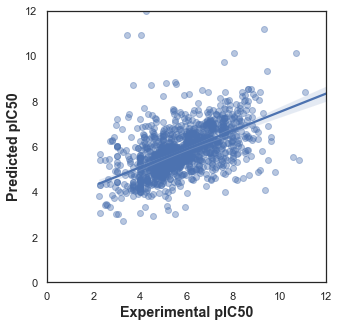

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show